In [5]:
import pandas as pd
import numpy as np
import os
import sys
from sklearn.metrics import confusion_matrix, classification_report
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Audio
Ravdess="C:\\Users\\pasup\\Documents\\classes\\ML\\Project\\speech-emotion-recognition-ravdess-data\\"
ravdess_directory_list = os.listdir(Ravdess)
Tess="C:\\Users\\pasup\\Documents\\classes\\ML\Project\\TESS\\TESS Toronto emotional speech set data\\"
tess_directory_list = os.listdir(Tess)


file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
print(Ravdess_df)



      Emotions                                               Path
0      neutral  C:\Users\pasup\Documents\classes\ML\Project\sp...
1      neutral  C:\Users\pasup\Documents\classes\ML\Project\sp...
2      neutral  C:\Users\pasup\Documents\classes\ML\Project\sp...
3      neutral  C:\Users\pasup\Documents\classes\ML\Project\sp...
4         calm  C:\Users\pasup\Documents\classes\ML\Project\sp...
...        ...                                                ...
1435  surprise  C:\Users\pasup\Documents\classes\ML\Project\sp...
1436  surprise  C:\Users\pasup\Documents\classes\ML\Project\sp...
1437  surprise  C:\Users\pasup\Documents\classes\ML\Project\sp...
1438  surprise  C:\Users\pasup\Documents\classes\ML\Project\sp...
1439  surprise  C:\Users\pasup\Documents\classes\ML\Project\sp...

[1440 rows x 2 columns]


In [6]:
file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
print(Tess_df)

     Emotions                                               Path
0       angry  C:\Users\pasup\Documents\classes\ML\Project\TE...
1       angry  C:\Users\pasup\Documents\classes\ML\Project\TE...
2       angry  C:\Users\pasup\Documents\classes\ML\Project\TE...
3       angry  C:\Users\pasup\Documents\classes\ML\Project\TE...
4       angry  C:\Users\pasup\Documents\classes\ML\Project\TE...
...       ...                                                ...
2795      sad  C:\Users\pasup\Documents\classes\ML\Project\TE...
2796      sad  C:\Users\pasup\Documents\classes\ML\Project\TE...
2797      sad  C:\Users\pasup\Documents\classes\ML\Project\TE...
2798      sad  C:\Users\pasup\Documents\classes\ML\Project\TE...
2799      sad  C:\Users\pasup\Documents\classes\ML\Project\TE...

[2800 rows x 2 columns]


In [7]:
data_path = pd.concat([Ravdess_df,  Tess_df], axis = 0)
data_path.reset_index(inplace=True, drop=True) 
data_path.to_csv("data_path.csv",index=False)
print(data_path)

     Emotions                                               Path
0     neutral  C:\Users\pasup\Documents\classes\ML\Project\sp...
1     neutral  C:\Users\pasup\Documents\classes\ML\Project\sp...
2     neutral  C:\Users\pasup\Documents\classes\ML\Project\sp...
3     neutral  C:\Users\pasup\Documents\classes\ML\Project\sp...
4        calm  C:\Users\pasup\Documents\classes\ML\Project\sp...
...       ...                                                ...
4235      sad  C:\Users\pasup\Documents\classes\ML\Project\TE...
4236      sad  C:\Users\pasup\Documents\classes\ML\Project\TE...
4237      sad  C:\Users\pasup\Documents\classes\ML\Project\TE...
4238      sad  C:\Users\pasup\Documents\classes\ML\Project\TE...
4239      sad  C:\Users\pasup\Documents\classes\ML\Project\TE...

[4240 rows x 2 columns]


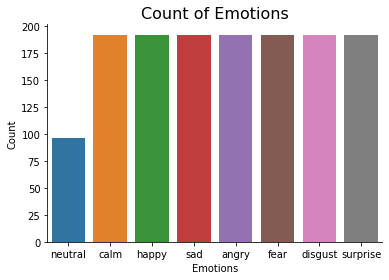

In [8]:
import seaborn as sns
plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions',data=Ravdess_df)
plt.ylabel('Count', size=10)
plt.xlabel('Emotions', size=10)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

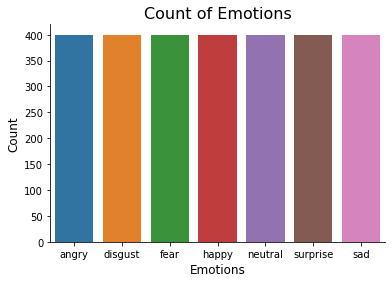

In [9]:
import seaborn as sns
plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions',data=Tess_df)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

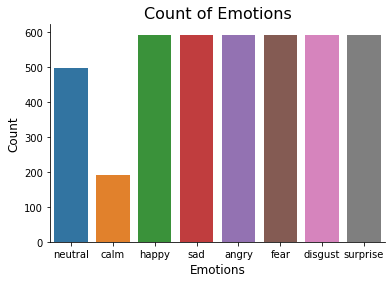

In [10]:
import seaborn as sns
plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions',data=data_path)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [11]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [12]:
import librosa.display
def plot(chroma,mfccs,S,sr,emotion):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='Chromagram for '+emotion)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='MFCC for '+emotion)
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',
                             y_axis='mel', sr=sr,
                             fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram for '+emotion)

def plotemotion(emotion):
    path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
    data, sampling_rate = librosa.load(path)
    stft = np.abs(librosa.stft(data))
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sampling_rate)
    mfcc = librosa.feature.mfcc(y=data, sr=sampling_rate)
    mel =librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    plot(chroma_stft,mfcc,mel,sampling_rate,emotion)   
    create_waveplot(data, sampling_rate, emotion)
    create_spectrogram(data, sampling_rate, emotion)

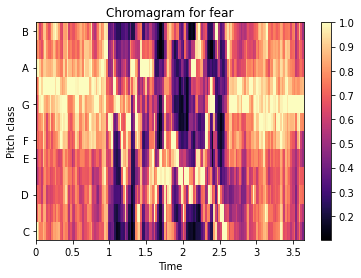

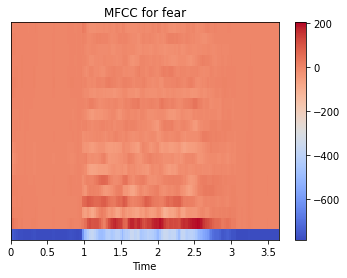

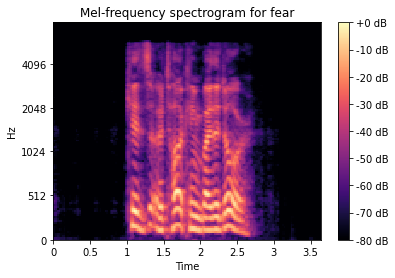

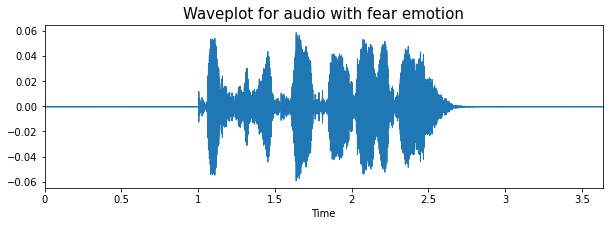

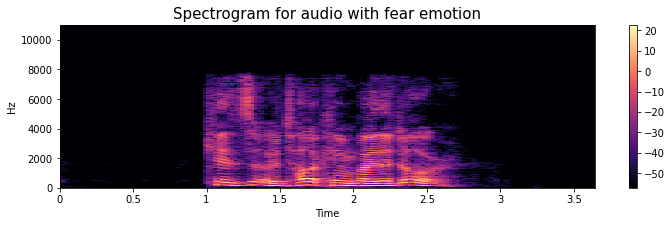

In [13]:
plotemotion('fear')

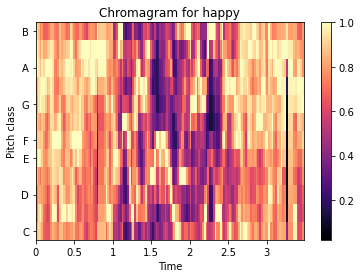

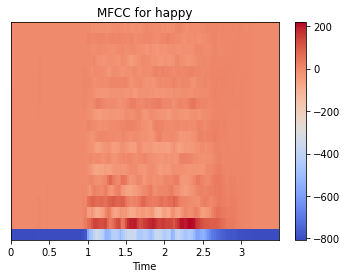

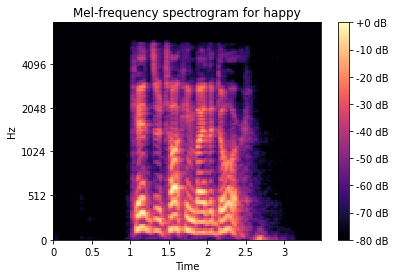

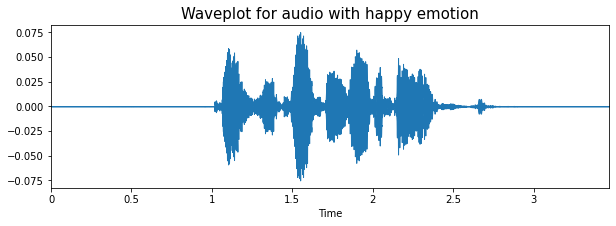

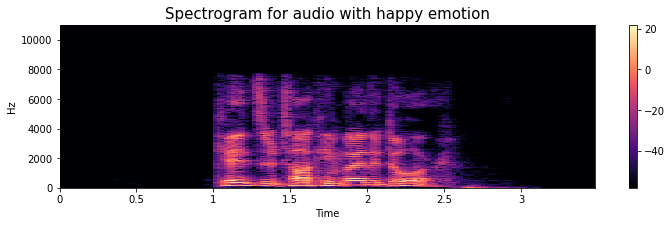

In [14]:
plotemotion('happy')

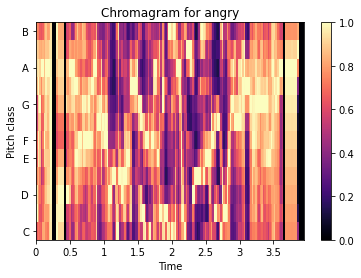

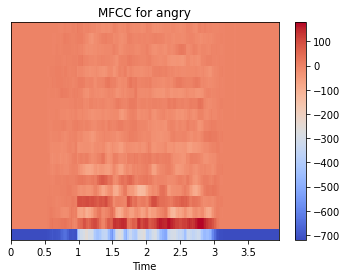

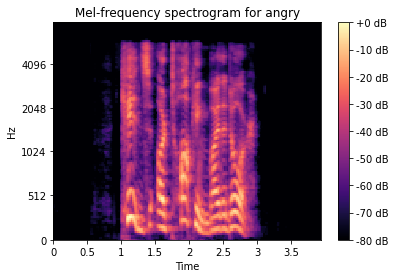

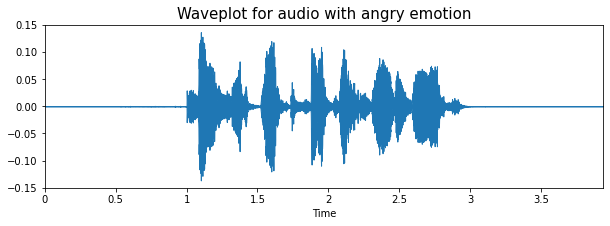

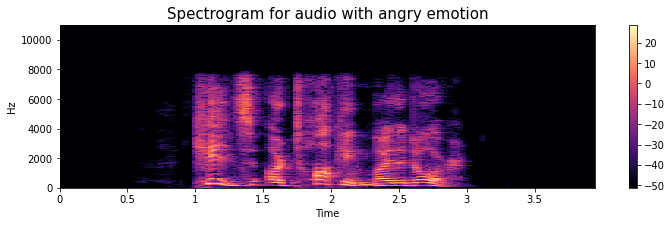

In [15]:
plotemotion('angry')

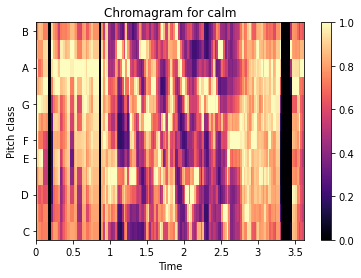

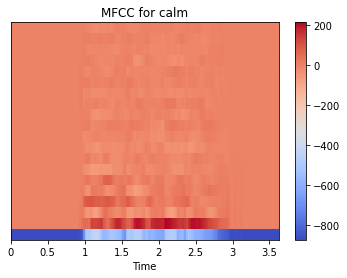

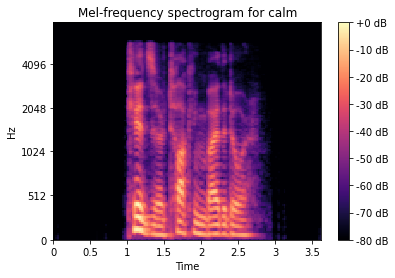

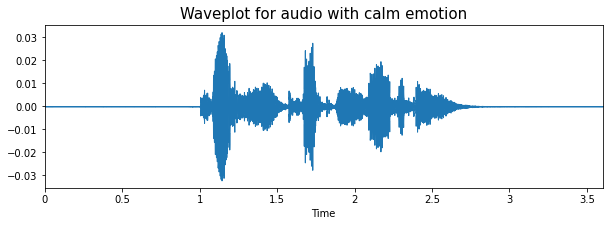

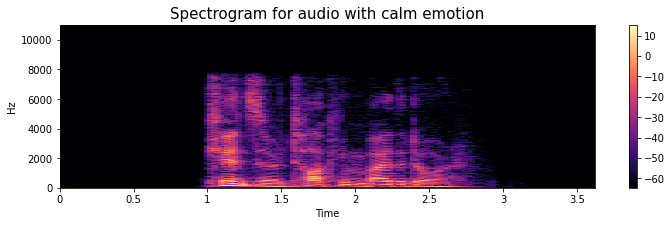

In [16]:
plotemotion('calm')

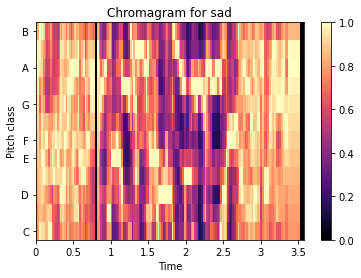

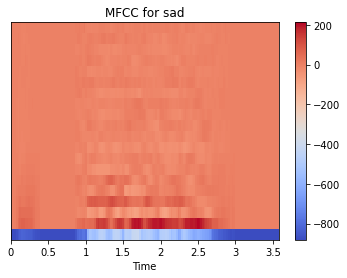

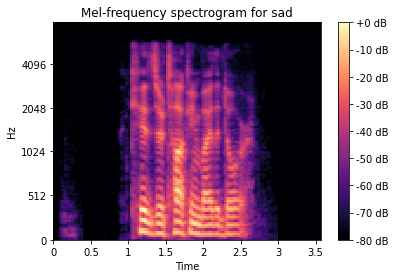

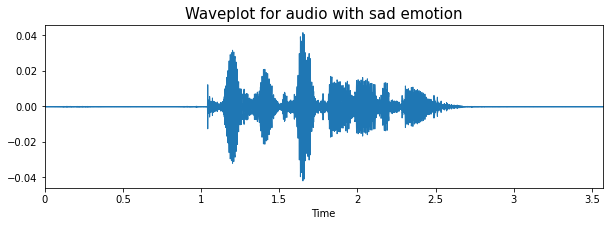

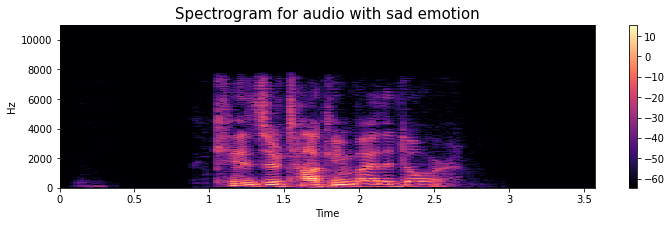

In [17]:
plotemotion('sad')

In [23]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally
    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result




In [24]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    noise_data = data
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    return result

In [25]:
data_path

,Emotions,Path
0,neutral,C:\Users\pasup\Documents\classes\ML\Project\sp...
1,neutral,C:\Users\pasup\Documents\classes\ML\Project\sp...
2,neutral,C:\Users\pasup\Documents\classes\ML\Project\sp...
3,neutral,C:\Users\pasup\Documents\classes\ML\Project\sp...
4,calm,C:\Users\pasup\Documents\classes\ML\Project\sp...
...,...,...
4235,sad,C:\Users\pasup\Documents\classes\ML\Project\TE...
4236,sad,C:\Users\pasup\Documents\classes\ML\Project\TE...
4237,sad,C:\Users\pasup\Documents\classes\ML\Project\TE...
4238,sad,C:\Users\pasup\Documents\classes\ML\Project\TE...


In [27]:
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
        
len(X), len(Y), data_path.Path.shape

(8480, 8480, (4240,))

In [28]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.237707,0.659504,0.688300,0.660306,0.668153,0.691578,0.679806,0.700728,0.743931,0.777429,...,1.971535e-16,1.694119e-16,1.561859e-16,1.566727e-16,1.521193e-16,1.325442e-16,1.309995e-16,1.341276e-16,1.188672e-16,neutral
1,0.237707,0.659504,0.688300,0.660306,0.668153,0.691578,0.679806,0.700728,0.743931,0.777429,...,1.971535e-16,1.694119e-16,1.561859e-16,1.566727e-16,1.521193e-16,1.325442e-16,1.309995e-16,1.341276e-16,1.188672e-16,neutral
2,0.207284,0.649996,0.689978,0.661347,0.645627,0.683499,0.684929,0.679601,0.732510,0.756296,...,9.362395e-17,1.017879e-16,8.988049e-17,9.321180e-17,9.068552e-17,9.977286e-17,8.490875e-17,8.585167e-17,9.594946e-17,neutral
3,0.207284,0.649996,0.689978,0.661347,0.645627,0.683499,0.684929,0.679601,0.732510,0.756296,...,9.362395e-17,1.017879e-16,8.988049e-17,9.321180e-17,9.068552e-17,9.977286e-17,8.490875e-17,8.585167e-17,9.594946e-17,neutral
4,0.192564,0.658022,0.711025,0.704244,0.707647,0.699569,0.658580,0.658836,0.711241,0.760990,...,1.700120e-16,1.754964e-16,1.352653e-16,1.149393e-16,1.312157e-16,1.201942e-16,1.393019e-16,1.438993e-16,1.280916e-16,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8475,0.136307,0.504474,0.444878,0.385170,0.384356,0.407676,0.446998,0.449470,0.529639,0.611374,...,4.226957e-03,3.647000e-03,1.897228e-03,2.696514e-03,5.229783e-03,2.539625e-03,6.250721e-04,1.140569e-04,8.986071e-06,sad
8476,0.042559,0.385776,0.346572,0.259963,0.284293,0.284945,0.388868,0.477742,0.437769,0.551280,...,3.309650e-05,3.378527e-05,5.775875e-05,5.614581e-05,7.292224e-05,4.575370e-05,2.356311e-05,6.946590e-06,3.067235e-06,sad
8477,0.042559,0.385776,0.346572,0.259963,0.284293,0.284945,0.388868,0.477742,0.437769,0.551280,...,3.309650e-05,3.378527e-05,5.775875e-05,5.614581e-05,7.292224e-05,4.575370e-05,2.356311e-05,6.946590e-06,3.067235e-06,sad
8478,0.082564,0.429035,0.467454,0.366867,0.379050,0.359398,0.427272,0.481370,0.480836,0.592812,...,1.479005e-04,1.616884e-04,1.508408e-04,1.814116e-04,1.816919e-04,1.122789e-04,7.422200e-05,2.171396e-05,2.901469e-06,sad


In [29]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [30]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6360, 162), (6360,), (2120, 162), (2120,))

In [31]:
from sklearn.neural_network import MLPClassifier
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)


In [32]:
#DataFlair - Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [33]:
pred_test = model.predict(x_test)


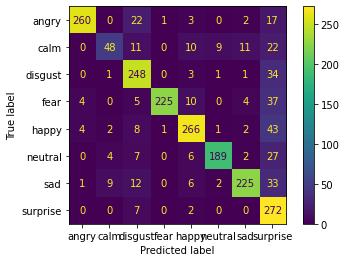

In [34]:
from sklearn import datasets, metrics
cm = confusion_matrix(y_test, pred_test, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()


In [35]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

       angry       0.97      0.85      0.91       305
        calm       0.75      0.43      0.55       111
     disgust       0.78      0.86      0.82       288
        fear       0.99      0.79      0.88       285
       happy       0.87      0.81      0.84       327
     neutral       0.94      0.80      0.86       235
         sad       0.91      0.78      0.84       288
    surprise       0.56      0.97      0.71       281

    accuracy                           0.82      2120
   macro avg       0.84      0.79      0.80      2120
weighted avg       0.85      0.82      0.82      2120



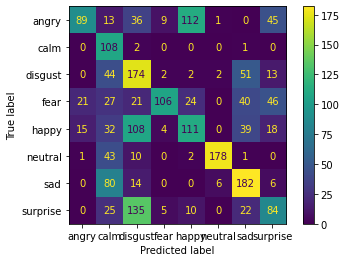

In [36]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
pred_test = model.predict(x_test)
cm = confusion_matrix(y_test, pred_test, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [37]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

       angry       0.71      0.29      0.41       305
        calm       0.29      0.97      0.45       111
     disgust       0.35      0.60      0.44       288
        fear       0.84      0.37      0.52       285
       happy       0.43      0.34      0.38       327
     neutral       0.95      0.76      0.84       235
         sad       0.54      0.63      0.58       288
    surprise       0.40      0.30      0.34       281

    accuracy                           0.49      2120
   macro avg       0.56      0.53      0.50      2120
weighted avg       0.57      0.49      0.49      2120



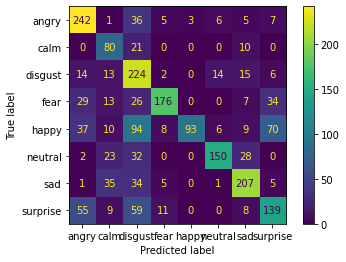

In [38]:
from sklearn import svm
model = svm.SVC()
model.fit(x_train,y_train)
pred_test = model.predict(x_test)
cm = confusion_matrix(y_test, pred_test, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [39]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

       angry       0.64      0.79      0.71       305
        calm       0.43      0.72      0.54       111
     disgust       0.43      0.78      0.55       288
        fear       0.85      0.62      0.72       285
       happy       0.97      0.28      0.44       327
     neutral       0.85      0.64      0.73       235
         sad       0.72      0.72      0.72       288
    surprise       0.53      0.49      0.51       281

    accuracy                           0.62      2120
   macro avg       0.68      0.63      0.61      2120
weighted avg       0.70      0.62      0.61      2120



In [42]:
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

In [43]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
100/100 [==============================] - 14s 133ms/step - loss: 1.7782 - accuracy: 0.3217 - val_loss: 1.3801 - val_accuracy: 0.5160 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 14s 139ms/step - loss: 1.2510 - accuracy: 0.5527 - val_loss: 1.0407 - val_accuracy: 0.6302 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - 15s 150ms/step - loss: 0.9892 - accuracy: 0.6377 - val_loss: 0.8366 - val_accuracy: 0.7019 - lr: 0.0010
Epoch 4/50
100/100 [==============================] - 16s 157ms/step - loss: 0.8482 - accuracy: 0.6777 - val_loss: 0.7773 - val_accuracy: 0.7090 - lr: 0.0010
Epoch 5/50
100/100 [==============================] - 17s 166ms/step - loss: 0.7686 - accuracy: 0.7226 - val_loss: 0.6826 - val_accuracy: 0.7495 - lr: 0.0010
Epoch 6/50
100/100 [==============================] - 16s 164ms/step - loss: 0.6987 - accuracy: 0.7478 - val_loss: 0.6416 - val_accuracy: 0.7557 - lr: 0.0010
Epoch 7/50
100/100 [==============================] 

67/67 [==============================] - 1s 15ms/step - loss: 0.2163 - accuracy: 0.9585
Accuracy of our model on test data :  95.84905505180359 %


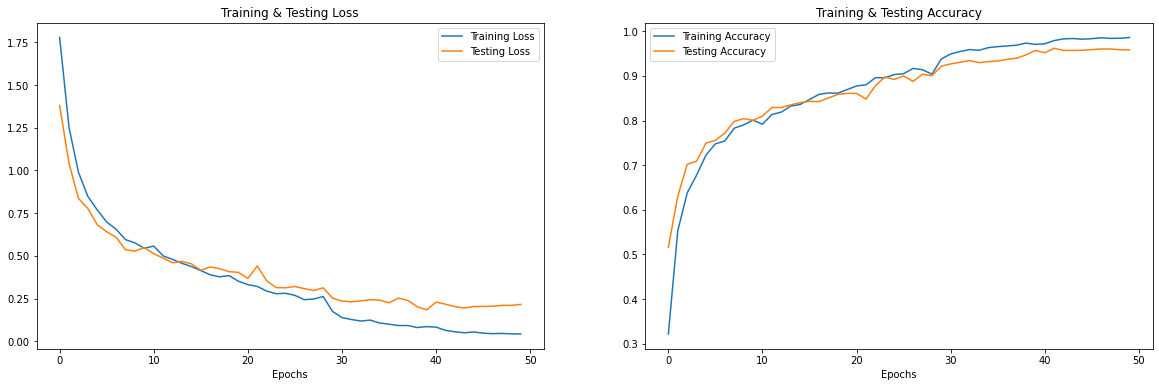

In [44]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [45]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [46]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,surprise,surprise
1,angry,angry
2,happy,happy
3,surprise,surprise
4,disgust,disgust
5,happy,happy
6,surprise,surprise
7,disgust,disgust
8,happy,happy
9,disgust,disgust


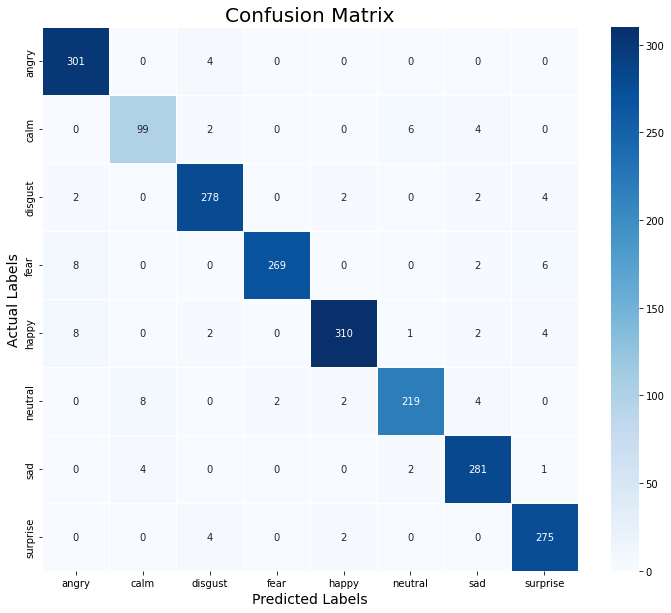

In [47]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.94      0.99      0.96       305
        calm       0.89      0.89      0.89       111
     disgust       0.96      0.97      0.96       288
        fear       0.99      0.94      0.97       285
       happy       0.98      0.95      0.96       327
     neutral       0.96      0.93      0.95       235
         sad       0.95      0.98      0.96       288
    surprise       0.95      0.98      0.96       281

    accuracy                           0.96      2120
   macro avg       0.95      0.95      0.95      2120
weighted avg       0.96      0.96      0.96      2120

